# DataLoader

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()
#cancer # 이 안에 유방암 데이터 다 들어있다.

# Model 생성과 학습하기

In [2]:
'''
stratify = cancer.target
지정한 데이터의 비율을 유지하는 옵션

stratify 매개변수의 값을 Y로 전달하면
훈련세트, 테스트세트 데이터에 있는 라벨(클래스, y)의 비율이
원본 데이터셋 라벨비율과 동일하게 유지된다.
'''

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify=cancer.target)
tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

# 평가하기 - Training VS Test

In [3]:
print('Training DataSet 정확도:{:3f}'.format(tree.score(X_train, y_train)))
print('Test DataSet 정확도:{:3f}'.format(tree.score(X_test, y_test)))

Training DataSet 정확도:1.000000
Test DataSet 정확도:0.937063


## 가지치기

In [4]:
# 모델 생성시 옵션을 부여한다.
# tree = DecisionTreeClassifier(min_samples_split=30, random_state=0)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Training DataSet 정확도:{:3f}'.format(tree.score(X_train, y_train)))
print('Test DataSet 정확도:{:3f}'.format(tree.score(X_test, y_test)))

Training DataSet 정확도:0.988263
Test DataSet 정확도:0.951049


## 특성 중요도
    결정트리 모델을 생성하고 수행하게 되면
    결과적으로 속성의 중요도를 알 수 있는 특성 중요도 인스턴스가 생성된다.
    
    결정트리를 만드는데 있어서
    어떤 의사결정, 조건, 질문, 특징, 속성으로 결정되는가...다 같은 말이다.
    
    특성 중요도는 
    Tree모델을 생성해서 학습시키고 나면 내부적으로 생성되는 인스턴스이다.
    트리구조상 상위에 있는 특성, 속성이 중요한 것으로 지정되며 
    트리계층을 내려갈수록 중요도가 떨어지는데, 이것은 필요없는 속성으로 바로 
    간주되어서는 위험한 발상이다.
    특성 중요도는 트리의 계층구조와 밀접한 연관을 가진다.
    
    머신러닝의 Flow를 짚어보면,
    1. 데이터분석(로드된 데이터에서 속성을 추출 | 추출된 속성들을 정제, 가공)
    2. 결정트리 모델 생성, 학습을 진행
    3. 특성 중요도가 도출 --- 학습하고 있는 속성들 30개 중에서 중요한 속성과 반면에 덜 중요한 속성들이 구분된다.
    4. 3번의 작업을 바탕으로 어떤 특성이 중요한지 사용자, 의뢰인에게 알려줄 수 있고 해당 특성 정보를 이용해서 다시 더 효율적인 작업을
       진행, 추후 성능을 좀 더 높이는데 활용할 수 있다.
       결과적으로 속성이 많을 때 그리 기여도가 크기 않은 속성을 제거함으로써 오버핏팅의 가능성을 줄여줄 수 있다.
    

In [5]:
print('특성 중요도:\n{}'.format(tree.feature_importances_))


특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [6]:
# from sklearn.feature_selection import RFE

# tree = DecisionTreeClassifier(max_depth=4, random_state=0)
# rfe = RFE(tree)
# model = rfe.fit(X_train, y_train)

# print(model.n_features_)
# print(model.ranking_)

## 특성 중요도 시각화

In [7]:
import matplotlib.pyplot as plt
import numpy as np

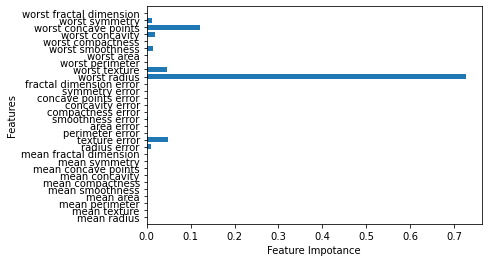

In [8]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature Impotance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

In [9]:
import graphviz
from sklearn.tree import export_graphviz

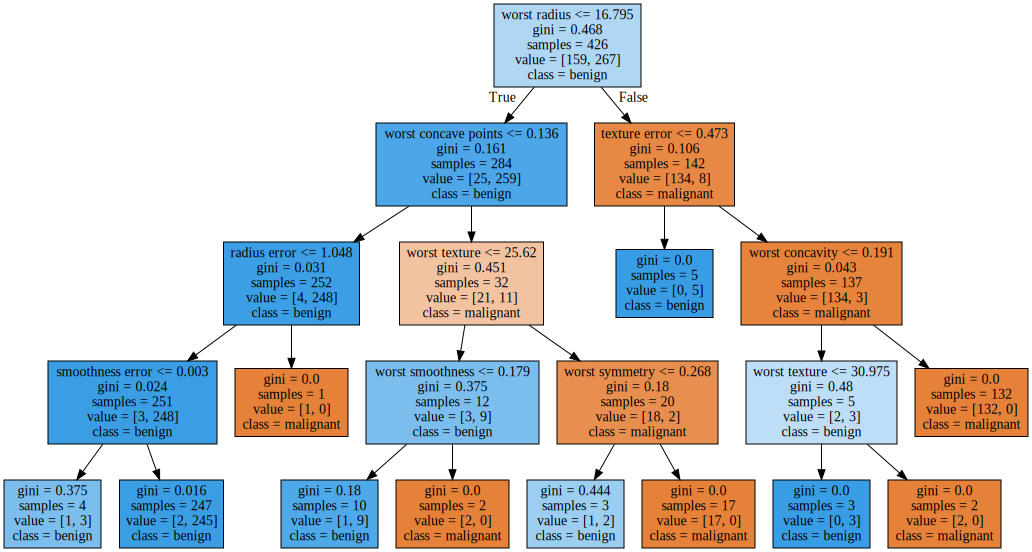

In [10]:
export_graphviz(tree, out_file='cancer_tree.dot',
               class_names=cancer.target_names,
               feature_names=cancer.feature_names,
               filled=True
               )

with open('cancer_tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))